# Régression linéaire multiple

# Projet 1: prédiction des prix des maisons à Paris

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
paris = pd.read_csv('ParisLogement.csv')

In [5]:
paris

,RevenuMoyenSecteur,AgeMoyenMaisonSecteur,NombreMoyenChambres,NombreMoyenChambreCoucher,Population,Prix
0,79545.46,5.68,7.01,4.09,23086.80,1059033.56
1,79248.64,6.00,6.73,3.09,40173.07,1505890.91
2,61287.07,5.87,8.51,5.13,36882.16,1058987.99
3,63345.24,7.19,5.59,3.26,34310.24,1260616.81
4,59982.20,5.04,7.84,4.23,26354.11,630943.49
...,...,...,...,...,...,...
4995,60567.94,7.83,6.14,3.46,22837.36,1060193.79
4996,78491.28,7.00,6.58,4.02,25616.12,1482617.73
4997,63390.69,7.25,4.81,2.13,33266.15,1030729.58
4998,68001.33,5.53,7.13,5.44,42625.62,1198656.87


In [6]:
paris.columns

Index(['RevenuMoyenSecteur', 'AgeMoyenMaisonSecteur', 'NombreMoyenChambres',
       'NombreMoyenChambreCoucher', 'Population', 'Prix'],
      dtype='object')

In [7]:
paris.describe()

,RevenuMoyenSecteur,AgeMoyenMaisonSecteur,NombreMoyenChambres,NombreMoyenChambreCoucher,Population,Prix
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108950,5.977278,6.987770,3.981330,36163.516088,1.232073e+06
std,10657.991228,0.991437,1.005799,1.234137,9925.650059,3.531176e+05
min,17796.630000,2.640000,3.240000,2.000000,172.610000,1.593866e+04
25%,61480.565000,5.320000,6.300000,3.140000,29403.930000,9.975771e+05
50%,68804.285000,5.970000,7.000000,4.050000,36199.405000,1.232669e+06
75%,75783.342500,6.650000,7.670000,4.490000,42861.290000,1.471210e+06
max,107701.750000,9.520000,10.760000,6.500000,69621.710000,2.469066e+06


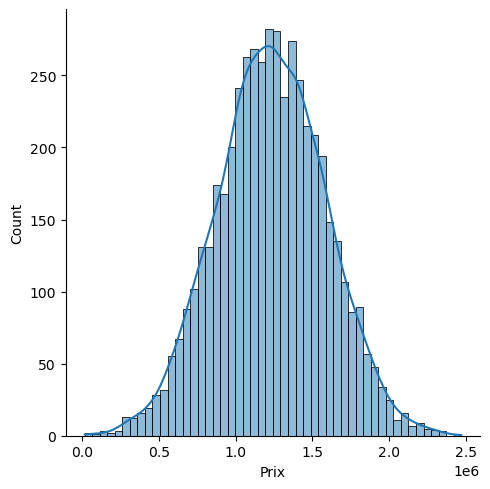

In [8]:
sns.displot(paris.Prix, bins = 50, kde = True)

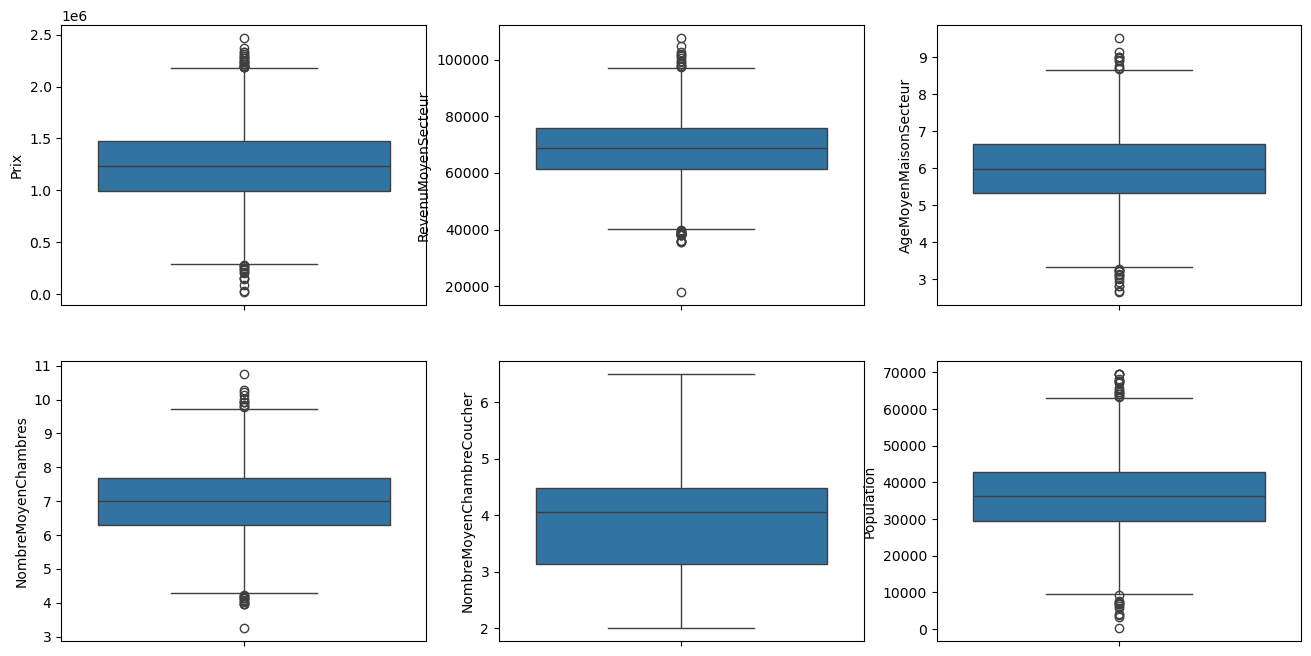

In [9]:
fig, axes = plt.subplots(2,3 , figsize = (16,8))
catplot1 = sns.boxplot(y = 'Prix', data = paris, ax = axes[0,0])
catplot1 = sns.boxplot(y = 'RevenuMoyenSecteur', data = paris, ax = axes[0,1])
catplot1 = sns.boxplot(y = 'AgeMoyenMaisonSecteur', data = paris, ax = axes[0,2])
catplot1 = sns.boxplot(y = 'NombreMoyenChambres', data = paris, ax = axes[1,0])
catplot1 = sns.boxplot(y = 'NombreMoyenChambreCoucher', data = paris, ax = axes[1,1])
catplot1 = sns.boxplot(y = 'Population', data = paris, ax = axes[1,2])

In [10]:
paris.corr()

,RevenuMoyenSecteur,AgeMoyenMaisonSecteur,NombreMoyenChambres,NombreMoyenChambreCoucher,Population,Prix
RevenuMoyenSecteur,1.000000,-0.001997,-0.011064,0.019788,-0.016234,0.639734
AgeMoyenMaisonSecteur,-0.001997,1.000000,-0.009357,0.006170,-0.018730,0.452575
NombreMoyenChambres,-0.011064,-0.009357,1.000000,0.462668,0.002038,0.335651
NombreMoyenChambreCoucher,0.019788,0.006170,0.462668,1.000000,-0.022168,0.171071
Population,-0.016234,-0.018730,0.002038,-0.022168,1.000000,0.408556
Prix,0.639734,0.452575,0.335651,0.171071,0.408556,1.000000


<Axes: >

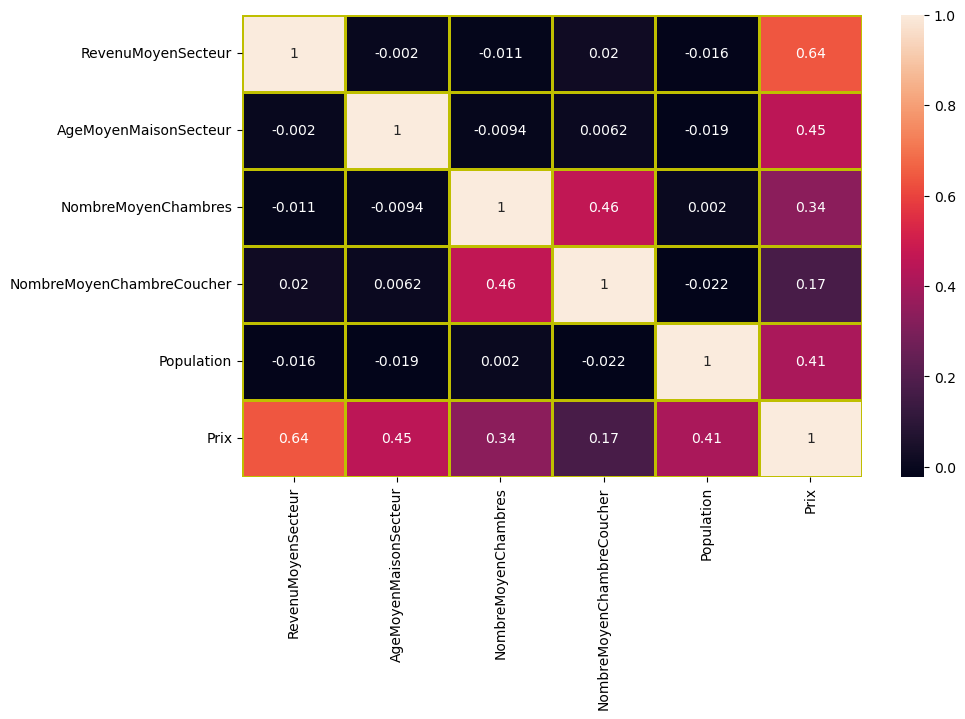

In [11]:
plt.figure(figsize = (10,6))
sns.heatmap(paris.corr(), annot = True, linewidths = 2, linecolor = 'y')

In [12]:
X = paris[['RevenuMoyenSecteur', 'AgeMoyenMaisonSecteur', 'NombreMoyenChambres', 
          'NombreMoyenChambreCoucher', 'Population']]

In [13]:
X

,RevenuMoyenSecteur,AgeMoyenMaisonSecteur,NombreMoyenChambres,NombreMoyenChambreCoucher,Population
0,79545.46,5.68,7.01,4.09,23086.80
1,79248.64,6.00,6.73,3.09,40173.07
2,61287.07,5.87,8.51,5.13,36882.16
3,63345.24,7.19,5.59,3.26,34310.24
4,59982.20,5.04,7.84,4.23,26354.11
...,...,...,...,...,...
4995,60567.94,7.83,6.14,3.46,22837.36
4996,78491.28,7.00,6.58,4.02,25616.12
4997,63390.69,7.25,4.81,2.13,33266.15
4998,68001.33,5.53,7.13,5.44,42625.62


In [14]:
y = paris['Prix']

In [15]:
y

0       1059033.56
1       1505890.91
2       1058987.99
3       1260616.81
4        630943.49
           ...    
4995    1060193.79
4996    1482617.73
4997    1030729.58
4998    1198656.87
4999    1298950.48
Name: Prix, Length: 5000, dtype: float64

In [16]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
print('Données entrainment: ', X_train.shape)
print('Données de test: ', X_test.shape)

Données entrainment:  (4000, 5)
Données de test:  (1000, 5)


In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
print('Performance du modele sur la base des données apprentissage: ', model.score(X_train, y_train))

Performance du modele sur la base des données apprentissage:  0.9180820547878887


In [20]:
print(model.intercept_)

-2631987.2265422135


In [21]:
model.coef_

array([2.14380514e+01, 1.66075440e+05, 1.20578572e+05, 1.14497471e+03,
       1.53275619e+01])

In [22]:
coefDataset = pd.DataFrame(model.coef_, X.columns, columns = ['Coefficients'])

In [23]:
coefDataset

,Coefficients
RevenuMoyenSecteur,21.438051
AgeMoyenMaisonSecteur,166075.439976
NombreMoyenChambres,120578.571870
NombreMoyenChambreCoucher,1144.974714
Population,15.327562


In [24]:
predictions = model.predict(X_test)

In [25]:
print('La performance du modele sur la base des données du test :', model.score(X_test, y_test))

La performance du modele sur la base des données du test : 0.9176107184491455


In [26]:
predictions

array([ 814119.78048728, 1561350.94070163, 1323139.90777986,
       1189643.31633374,  969027.77657225, 1248950.4484287 ,
       1191848.34224246,  733323.07577692, 1217141.27960266,
       1537631.34755475, 1139862.78935657,  972378.36629082,
        971237.963598  , 1811222.2830504 , 1338187.89152114,
        684631.86071469, 2180307.64749792,  929632.23741176,
       1189684.82671701,  806844.11526528,  737069.6956233 ,
       1437973.19380826, 2048118.56286448, 1533112.88344591,
        703770.4187169 , 1444784.32772296, 1922789.24324594,
        800986.31486821, 1676554.42760661, 1022138.31690179,
       1121757.38310705, 1217971.6382595 , 1196513.45946133,
       1325017.9538876 , 1901984.40423643, 1701165.5731914 ,
       1676216.07466933, 1536090.25697483, 1067806.45123766,
        664168.83324013, 1639502.53801649, 1772869.2973677 ,
       1509712.04065128,  874970.77185085, 1181947.16078072,
        927528.38262059, 1415154.4454126 , 1475018.80880302,
       1770153.82324929,

In [27]:
y_test

789      800809.13
2507    1620949.44
2376    1219637.37
1378    1172133.49
598      864483.76
           ...    
1451    1316129.31
4921    1609092.32
3091     268050.81
3683    1399466.90
235     1039107.33
Name: Prix, Length: 1000, dtype: float64

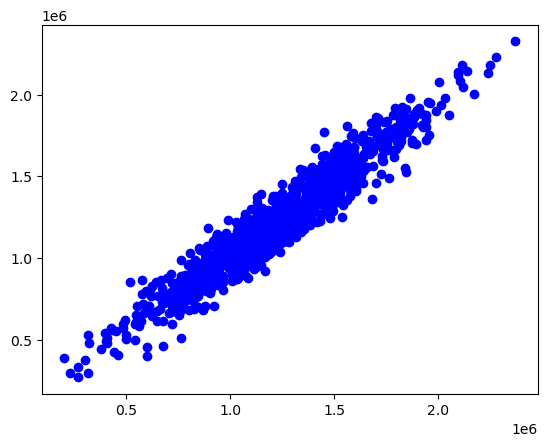

In [28]:
plt.scatter(y_test, predictions, c = 'b')

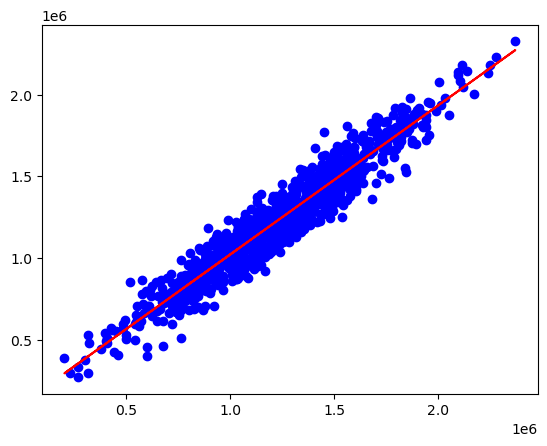

In [29]:
m, b = np.polyfit(y_test, predictions, 1)
plt.plot(y_test, predictions, 'bo', y_test, m*y_test + b, 'r')

In [30]:
y_test - predictions

789     -13310.650487
2507     59598.499298
2376   -103502.537780
1378    -17509.826334
598    -104544.016572
            ...      
1451    -76251.093660
4921     65286.763719
3091     -1024.178597
3683    112462.898490
235     112005.725870
Name: Prix, Length: 1000, dtype: float64

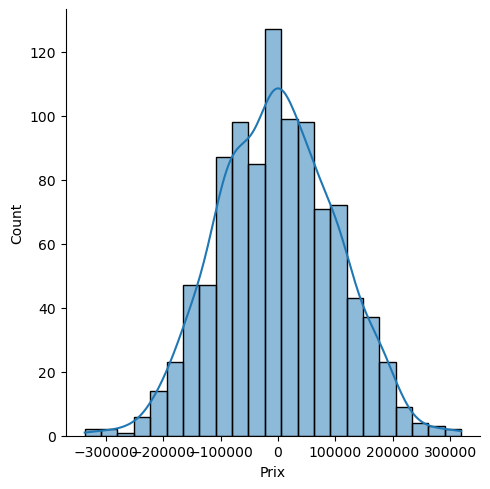

In [31]:
sns.displot(y_test - predictions, kde = True)